Gerard Marrugat

# Linear regression using robust functions

## 1. Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

#### Execise 1

Implement both methods, the standard and the perpendicular one using gradient descent with
backtracking (or a small constant $\alpha$ value)

#### Vertical offsets

In [2]:
#def Function(w,x,y):
#     return((1/2)*np.dot(np.dot(w.T,x)-y,(np.dot(w.T,x)-y).T))
    
def Function(w,x,y):
    
    e = 0 
    N = len(x)
    
    for i in range(0,N):
        e += (w[0]*x[i]+w[1]-y[i])**2
        
    error = e/2
    
    return(error)
    
#def gradient(w,x,y):
#    return(np.dot((np.dot(w.T,x)-y),x.T))

def gradient(w,x,y):
    
    dQ = [0,0]
    N = len(x)
    dQ_dw0 = 0
    dQ_dw1 = 0
    
    for i in range(N):
        dQ_dw0 += (w[0]*x[i] + w[1] - y[i])*x[i]
        
    for j in range(N):
        dQ_dw1 += (w[0]*x[i] + w[1] - y[i])
    
    dQ[0] = dQ_dw0
    dQ[1] = dQ_dw1
    return(dQ)
    
    

In [3]:
def vertical_offset(wk,x,y):

    wk_list = []
    wk_list.append(wk)
    alpha = 1
    w_candidate = np.subtract(wk,alpha*np.array(gradient(wk,x,y)))

    k = 0

    while True:

        alpha = 1

        while(Function(w_candidate,x,y) >= Function(wk,x,y)):

            alpha = alpha/2
            w_candidate = np.subtract(wk,alpha*np.array(gradient(wk,x,y)))
        
    
        wk_list.append(w_candidate.tolist())
        wk = w_candidate
        w_candidate = np.subtract(wk,alpha*np.array(gradient(wk,x,y)))
        k+=1
    
        if (abs((Function(w_candidate,x,y) - Function(wk,x,y)))<(10**-3)):
            print('Stopping criterion is satisfied: ',abs((Function(w_candidate,x,y)-Function(wk,x,y))))
            break
        
    print('Number of steps needed to converge:',k)
    print('The minimum reached is: ',w_candidate)
    print('Error:',Function(w_candidate,x,y))
    return(w_candidate)


#### Perpendicular offsets

In [4]:
def F_perp_offset(p,x,y):
    
    N = len(x)
    e = 0
    
    for i in range(N):
        e += ((p[0]*x[i]+p[1]*y[i]+p[2])**2)/(p[0]**2 + p[1]**2)
        
        error = e/2
    return(error)
    
def grad_perp_offset(p,x,y):
    dQ = [0,0,0]
    N = len(x)
    dQ_dw0 = 0
    dQ_dw1 = 0
    dQ_db = 0
        
    for i in range(N):
        dQ_dw0 += ((p[0]*x[i]+p[1]*y[i]+p[2])/(p[0]**2 + p[1]**2))*x[i] - (((p[0]*x[i]+p[1]*y[i]+p[2])/(p[0]**2 + p[1]**2))**2)*p[0]
        
    for j in range(N):
        dQ_dw1 += ((p[0]*x[j]+p[1]*y[j]+p[2])/(p[0]**2 + p[1]**2))*y[j] - (((p[0]*x[j]+p[1]*y[j]+p[2])/(p[0]**2 + p[1]**2))**2)*p[1]
    
    for k in range(N):
        dQ_db += ((p[0]*x[k]+p[1]*y[k]+p[2])/(p[0]**2 + p[1]**2))
    
    dQ[0] = dQ_dw0
    dQ[1] = dQ_dw1
    dQ[2] = dQ_db
    return(dQ)
    

In [5]:
def perp_offset(pk,x,y):

    pk_list = []
    pk_list.append(pk)

    alpha = 0.0001
    max_iter = 1000
    k = 0
    norm_ord = 2

    p_candidate = np.subtract(pk,alpha*np.array(grad_perp_offset(pk,x,y)))
    p_candidate = p_candidate/np.linalg.norm(p_candidate,norm_ord)

    while True:

   
        p_candidate = np.subtract(pk,alpha*np.array(grad_perp_offset(pk,x,y)))
        p_candidate = p_candidate/np.linalg.norm(p_candidate,norm_ord)
        
    
        pk_list.append(p_candidate.tolist())
    
        k+=1
    
        if (abs(F_perp_offset(p_candidate,x,y) - F_perp_offset(pk,x,y))<(10**-3)):
            print('Stopping criterion is satisfied: ',abs((F_perp_offset(p_candidate,x,y)-F_perp_offset(pk,x,y))))
            break
        
        pk = p_candidate
        p_candidate = np.subtract(pk,alpha*np.array(grad_perp_offset(pk,x,y)))
        p_candidate = p_candidate/np.linalg.norm(p_candidate,norm_ord)
        
    print('The minimum reached is: ',p_candidate)
    print('Norm',np.linalg.norm(p_candidate,norm_ord))
    print('Error: ',F_perp_offset(p_candidate,x,y))
    return(p_candidate)


#### Exercise 2

Continue with an experiment to see the difference between both models we have developed. In particular, we generate a random    set of values.

   You may try with and angle of 0, 45 and 90 degrees. 
   Compute the parameters associated to both models we have presented and draw the lines
   that have been obtained.

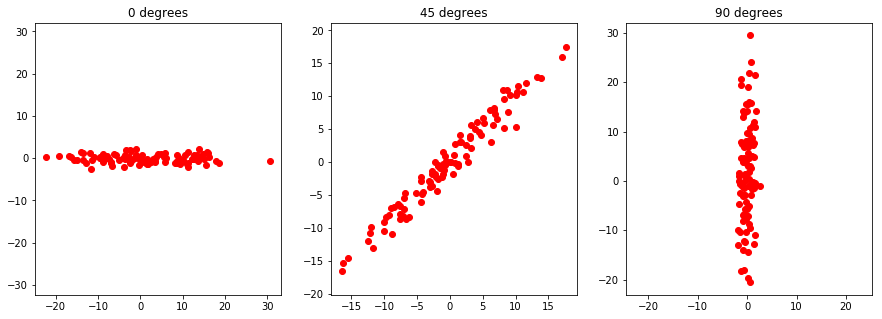

In [6]:
import math

m = [0.,0.]
angle_list = [0,45,90]

fig, axs = plt.subplots(1,3,figsize=(15,5))

for a in angle_list:
    angle = a*math.pi/180
    rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
    math.cos(angle)]])
    lamb = np.array([[100,0],[0,1]])
    s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
    c = np.random.multivariate_normal(m,s,100)

    axs[angle_list.index(a)].plot(c[:,0],c[:,1],'ro')
    axs[angle_list.index(a)].set_title(str(a)+' degrees')
    axs[angle_list.index(a)].axis('equal')



As it could be appreciatted in the plot above, the angle affects on the influence between coordinate x over y and vice versa. This fact is because the samples are randomly generated from a multivariate normal random variable, whose covariance matrix is generated in function of the value of the angle given.  

#### **Angle = 0 degrees**

In [7]:
m = [0.,0.]
angle = 0*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
c = np.random.multivariate_normal(m,s,100)

#### Vertical offset

Stopping criterion is satisfied:  3.552713678800501e-14
Number of steps needed to converge: 8
The minimum reached is:  [-0.02297999 -0.07069137]
Error: 53.67626357086614


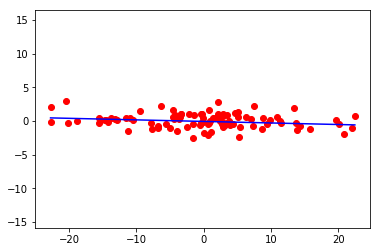

In [8]:
x = c[:,0]
y = c[:,1]

w = [0,1]


w_candidate = vertical_offset(w,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

x = np.arange(np.min(c[:,0]),np.max(c[:,0]),0.01)

Z = w0*x + w1
plt.plot(c[:,0],c[:,1],'ro')
plt.axis('equal')
plt.plot(x,Z,'b')

#### Perpendicular offset

Stopping criterion is satisfied:  0.0009833512326551386
The minimum reached is:  [ 0.02065604  0.99883975 -0.0435027 ]
Norm 0.9999999999999999
Error:  52.62107607903768


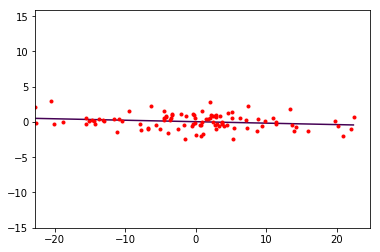

In [9]:
x = c[:,0]
y = c[:,1]

pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

#x_in = np.arange(-15,15,1)

#Z = (-w0*x_in -b)/w1

plt.axis('equal')
plt.plot(c[:,0],c[:,1],'r.')

x = np.arange(np.min(c[:,0]),np.max(c[:,0]),0.01)
y = np.arange(np.min(c[:,1]),np.max(c[:,1]),0.01)
[X,Y] = np.meshgrid(x,y)
Z = w0 * X + w1 * Y + b
plt.contour(X,Y,Z,[0])

plt.show()

   #### **Angle = 45 degrees**

In [10]:
import math

m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
c = np.random.multivariate_normal(m,s,100)

#### Vertical offset

Stopping criterion is satisfied:  0.00024088472947880746
Number of steps needed to converge: 47
The minimum reached is:  [0.96302917 0.7295029 ]
Error: 109.36676742971541


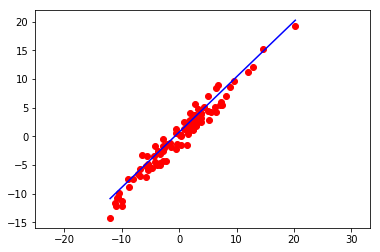

In [11]:
x = c[:,0]
y = c[:,1]

w = [0,1]

w_candidate = vertical_offset(w,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

x = np.arange(np.min(c[:,0]),np.max(c[:,0]),0.01)

Z = w0*x + w1
plt.plot(c[:,0],c[:,1],'ro')
plt.axis('equal')
plt.plot(x,Z,'b')

#### Perpendicular offset

Stopping criterion is satisfied:  0.0007753118152322713
The minimum reached is:  [-0.70683552  0.70737348  0.00251055]
Norm 0.9999999999999999
Error:  40.2274923251168


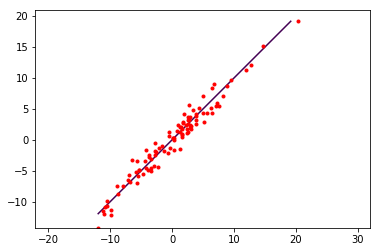

In [12]:
x = c[:,0]
y = c[:,1]

pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

#x_in = np.arange(-15,15,1)

#Z = (-w0*x_in -b)/w1

plt.axis('equal')
plt.plot(c[:,0],c[:,1],'r.')

x = np.arange(np.min(c[:,0]),np.max(c[:,0]),0.01)
y = np.arange(np.min(c[:,1]),np.max(c[:,1]),0.01)
[X,Y] = np.meshgrid(x,y)
Z = w0 * X + w1 * Y + b
plt.contour(X,Y,Z,[0])

plt.show()

#### **Angle = 90 degrees**

In [13]:
import math

m = [0.,0.]
angle = 90*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
c = np.random.multivariate_normal(m,s,100)

#### Vertical offset

Stopping criterion is satisfied:  9.094947017729282e-13
Number of steps needed to converge: 2
The minimum reached is:  [ 0.58422501 -1.41187088]
Error: 5943.177640341427


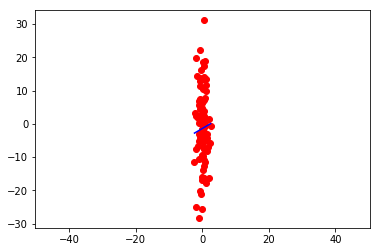

In [14]:
x = c[:,0]
y = c[:,1]

w = [1,0]


w_candidate = vertical_offset(w,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

x = np.arange(np.min(c[:,0]),np.max(c[:,0]),0.01)
y = np.arange(np.min(c[:,0]),np.max(c[:,0]),0.01)

Z = w0*x + w1
plt.plot(c[:,0],c[:,1],'ro')
plt.axis('equal')
plt.plot(x,Z,'b')

In this case (angle = 90 degrees), vertical offset minimizes the error caused by the vertical difference between the predicted value $(w_0x+w_1)$ and real value $y$. This is done for all the samples, and that is the reason why the regression line is approximately horizontal.

#### Perpendicular offset

Stopping criterion is satisfied:  0.0009974054345605055
The minimum reached is:  [ 0.99979251  0.00154919 -0.0203112 ]
Norm 1.0
Error:  43.6187391478141


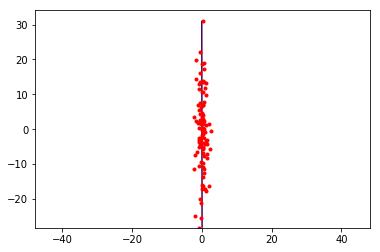

In [15]:
x = c[:,0]
y = c[:,1]

pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

#x_in = np.arange(-15,15,1)

#Z = (-w0*x_in -b)/w1

plt.axis('equal')
plt.plot(c[:,0],c[:,1],'r.')

x = np.arange(np.min(c[:,0]),np.max(c[:,0]),0.01)
y = np.arange(np.min(c[:,1]),np.max(c[:,1]),0.01)
[X,Y] = np.meshgrid(x,y)
Z = w0 * X + w1 * Y + b
plt.contour(X,Y,Z,[0])

plt.show()

Values $w0$,$w1$ and $b$ get so small due the condition that the norm of the vector formed by these three components should be one, $p = (w0,w1,b)$, $||p|| = 1$.

## Ascombe´s dataset

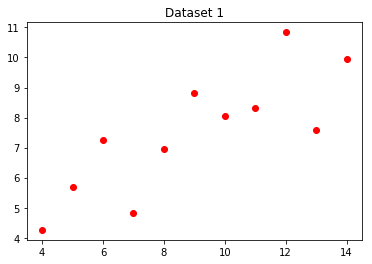

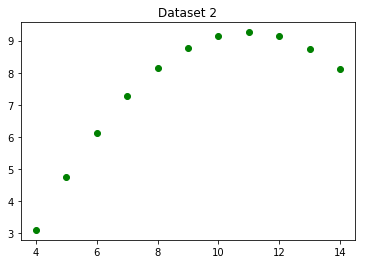

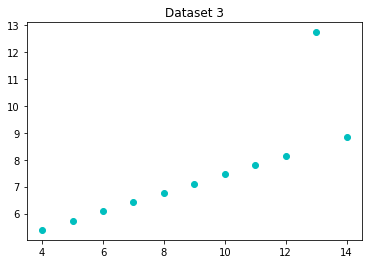

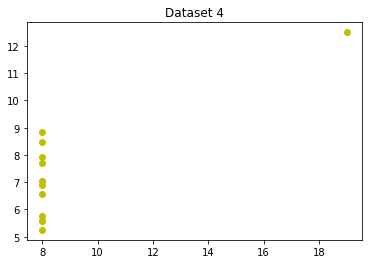

In [6]:
dataset1 = pd.read_csv('Dataset\Anscombe\data_set1.txt', sep='\t', header = None)
dataset2 = pd.read_csv('Dataset\Anscombe\data_set2.txt', sep='\t', header = None)
dataset3 = pd.read_csv('Dataset\Anscombe\data_set3.txt', sep='\t', header = None)
dataset4 = pd.read_csv('Dataset\Anscombe\data_set4.txt', sep='\t', header = None)


x = dataset1[0].values
y = dataset1[1].values

plt.title('Dataset 1')
plt.plot(x,y,'ro')
plt.show()

x = dataset2[0].values
y = dataset2[1].values

plt.title('Dataset 2')
plt.plot(x,y,'go')
plt.show()

x = dataset3[0].values
y = dataset3[1].values

plt.title('Dataset 3')
plt.plot(x,y,'co')
plt.show()

x = dataset4[0].values
y = dataset4[1].values

plt.title('Dataset 4')
plt.plot(x,y,'yo')
plt.show()

We have already seen each dataset plotted, but let´s comment them thoroughly to achieve a deeper understanding.

$\underline{Dataset\ 1}$

Random samples from what could be a linear function with vertical noise added.

$\underline{Dataset\ 2}$

The dots in the plot seem to fit with the behaviour of a quadratic function.

$\underline{Dataset\ 3}$

The plot shows us the behaviour of a linear function but one of the samples does not follow the behaviour of the rest of the dataset. This special sample is an outlier in the dataset.

$\underline{Dataset\ 4}$

It is clearly a vertical line when the x-axis is equal to eight but as happened in the dataset 3, there is also an outlier that does not follow the same behaviour of the rest of the samples. 

$\underline{Dataset\ 1}$

Stopping criterion is satisfied:  0.0009512844042740554
Number of steps needed to converge: 186
The minimum reached is:  [0.50753109 2.9181355 ]
Error: 6.885626072567283
Stopping criterion is satisfied:  0.0009485530936972353
The minimum reached is:  [-0.62265034  0.77981635 -0.06475354]
Norm 1.0
Error:  7.372666722678271


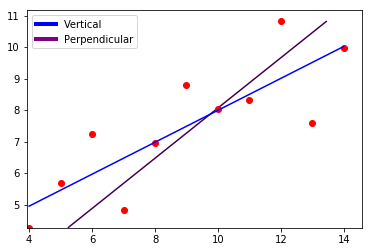

In [27]:
#Vertical

x = dataset1[0].values
y = dataset1[1].values

wk = [1,0]

w_candidate = vertical_offset(wk,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

x_in = np.arange(np.min(x),np.max(x),0.01)

Z = w0*x_in + w1

plt.plot(x,y,'ro')
plt.axis('equal')
plt.plot(x_in,Z,'b', label = 'Vertical')
#plt.legend()

#Perpendicular
pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]


x = np.arange(np.min(x),np.max(x),0.01)
y = np.arange(np.min(y),np.max(y),0.01)
[X,Y] = np.meshgrid(x,y)
Z = w0 * X + w1 * Y + b

cntr_perp = plt.contour(X,Y,Z,[0])

nm, lbl = cntr_perp.legend_elements()

#plt.legend(title= 'Perpendicular', fontsize= 8) 
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='purple', lw=4)]

plt.legend(custom_lines, ['Vertical', 'Perpendicular'],loc = "upper left")

plt.show()


$\underline{Dataset\ 2}$

Stopping criterion is satisfied:  0.0009987561475952589
Number of steps needed to converge: 298
The minimum reached is:  [0.65283685 1.44008533]
Error: 8.361728518452122
Stopping criterion is satisfied:  0.000948652814864559
The minimum reached is:  [-0.62264996  0.77981658 -0.06475433]
Norm 1.0000000000000002
Error:  7.378641198619376


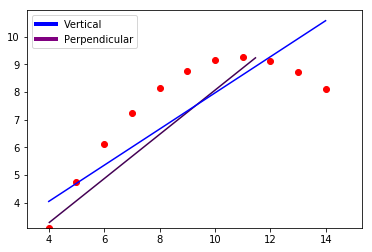

In [70]:
#Vertical

x = dataset2[0].values
y = dataset2[1].values

wk = [1,0]

w_candidate = vertical_offset(wk,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

x_in = np.arange(np.min(x),np.max(x),0.01)

Z = w0*x_in + w1
plt.plot(x,y,'ro')
plt.axis('equal')
plt.plot(x_in,Z,'b', label = 'Vertical')
#plt.legend()

#Perpendicular
pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

x_in = np.arange(np.min(x),np.max(x),0.01)
y_in = np.arange(np.min(y),np.max(y),0.01)
[X,Y] = np.meshgrid(x_in,y_in)
Z = w0 * X + w1 * Y + b

cntr_perp = plt.contour(X,Y,Z,[0])

nm, lbl = cntr_perp.legend_elements()

custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='purple', lw=4)]

plt.legend(custom_lines, ['Vertical', 'Perpendicular'],loc = "upper left")

plt.show()


$\underline{Dataset\ 3}$

Stopping criterion is satisfied:  9.040534041382386e-05
Number of steps needed to converge: 151
The minimum reached is:  [0.49876238 3.01527955]
Error: 6.878241425888098
Stopping criterion is satisfied:  0.0009500092255505521
The minimum reached is:  [-0.62259003  0.77986419 -0.06475723]
Norm 1.0
Error:  7.376704876687373


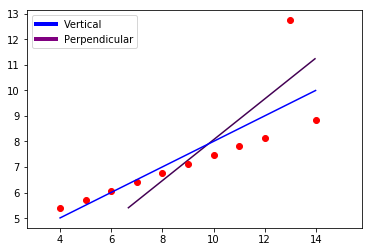

In [71]:
#Vertical

x = dataset3[0].values
y = dataset3[1].values

wk = [1,0]

w_candidate = vertical_offset(wk,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

x_in = np.arange(np.min(x),np.max(x),0.01)

Z = w0*x_in + w1
plt.plot(x,y,'ro')
plt.axis('equal')
plt.plot(x_in,Z,'b', label = 'Vertical')
#plt.legend()

#Perpendicular
pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

x_in = np.arange(np.min(x),np.max(x),0.01)
y_in = np.arange(np.min(y),np.max(y),0.01)
[X,Y] = np.meshgrid(x_in,y_in)
Z = w0 * X + w1 * Y + b

cntr_perp = plt.contour(X,Y,Z,[0])

nm, lbl = cntr_perp.legend_elements()

custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='purple', lw=4)]

plt.legend(custom_lines, ['Vertical', 'Perpendicular'],loc = "upper left")

plt.show()


$\underline{Dataset\ 4}$

Stopping criterion is satisfied:  0.000994620690969228
Number of steps needed to converge: 516
The minimum reached is:  [0.57421113 2.23136212]
Error: 7.231715008399476
Stopping criterion is satisfied:  0.0009493404042908438
The minimum reached is:  [-0.62263821  0.77982552 -0.06475969]
Norm 0.9999999999999999
Error:  7.370162050045597


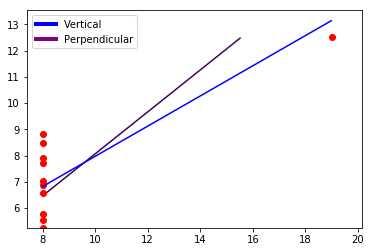

In [72]:
#Vertical

x = dataset4[0].values
y = dataset4[1].values

wk = [1,0]

w_candidate = vertical_offset(wk,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

x_in = np.arange(np.min(x),np.max(x),0.01)

Z = w0*x_in + w1
plt.plot(x,y,'ro')
plt.axis('equal')
plt.plot(x_in,Z,'b', label = 'Vertical')
#plt.legend()

#Perpendicular
pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

x_in = np.arange(np.min(x),np.max(x),0.01)
y_in = np.arange(np.min(y),np.max(y),0.01)
[X,Y] = np.meshgrid(x_in,y_in)
Z = w0 * X + w1 * Y + b

cntr_perp = plt.contour(X,Y,Z,[0])

nm, lbl = cntr_perp.legend_elements()

custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='purple', lw=4)]

plt.legend(custom_lines, ['Vertical', 'Perpendicular'],loc = "upper left")

plt.show()


Due the presence of outliers, the last two prediction models does not seem to be good candidates to each scenario. The origin of the influence of the outliers over the final prediction model is because the function to be minimized (least square error) returns a large value for the outliers, and consequently the estimated parameters are influenced by this value.

## 2. Robust function

#### Exercise 1

Plot the least squares function, $\rho(u) = \frac{1}{2}u^2$, and compare it with the Cauchy function, Eq.
(2), in order to see the “importance” that is given to each prediction error u. You may, for
instance, plot the function $\rho(u)$ for $|u| \geq 10$.

In [9]:
def lse(e):
    r = 0.5*e**2
    return(r)

def cauchy(e):
    r = 0.5*np.log(1+(e)**2)
    return(r)

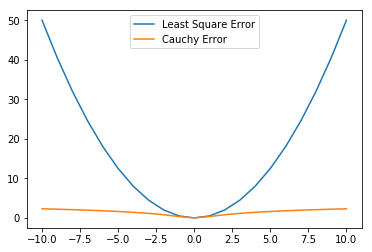

In [10]:
e = np.arange(-10,11,1)

lse_error = lse(e)

cauchy_error = cauchy(e)

plt.plot(e,lse_error,label='Least Square Error')
plt.plot(e,cauchy_error,label='Cauchy Error')
plt.legend()

Observing the previous plot we can conclude that least square method is very strict when a sample is not well predicted or when an outlier appears, and penalizes with a large error. For example, imagine that we have five samples, four are well predicted and one does not. The correct ones have a prediction error 1, which value with the least square error, $\rho(u) = \frac{1}{2}u^2$, is $0.5$. The mispredicted has a prediction error equal to $10$, which value using least square error is $50$. Then, the contribution to the total error of this set is not the same for each sample, the erratic prediction contributes more than the rest. This is the explanation why an outlier has a large square error.  
On the contrary, Cauchy function tries not to give too much importance too single erratic prediction but it does to the global of them.

#### Exercise 2

Compute the parameters for both models using the Cauchy function. Plot the results and and compare them with the results you obtained with the least squares
method.


In [7]:
def F_vert_Cauchy(w,x,y):
    
    r = 0
    u = 0
    N = len(x)
    
    for i in range(N):
        u = (w[0]*x[i]+w[1] - y[i])
        
        r+= 0.5*np.log(1+(u)**2)
        
    return(r)
    
#calculate the gradient for the Cauchy    
def gradient_vert_Cauchy(w,x,y):
    
    dQ = [0,0]
    dQ_dw0 = 0
    dQ_dw1 = 0
    
    N = len(x)
    
    for i in range(N):
        dQ_dw0 += (w[0]*x[i]+w[1] - y[i])*x[i]/(1+(w0*x[i]+w[1]-y[i])**2)
        
    for j in range(N):
        dQ_dw1 += (w[0]*x[j]+w[1] - y[j])/(1+(w0*x[j]+w[1]-y[j])**2)
    
    dQ[0] = dQ_dw0
    dQ[1] = dQ_dw1
    
    return(dQ)

In [8]:
def vertical_offset_Cauchy(wk,x,y):
    
    #x_augmented = np.c_[np.ones((x.shape[0],1)),x].T

    wk_list = []
    wk_list.append(wk)
    alpha = 1/10000
    w_candidate = np.subtract(wk,alpha*np.array(gradient_vert_Cauchy(wk,x,y)))

    k = 0

    while True:

    
        w_candidate = np.subtract(wk,alpha*np.array(gradient_vert_Cauchy(wk,x,y)))
        
    
        wk_list.append(w_candidate.tolist())
        wk = w_candidate
        w_candidate = np.subtract(wk,alpha*np.array(gradient_vert_Cauchy(wk,x,y)))
        k+=1
    
        if (abs((F_vert_Cauchy(w_candidate,x,y) - F_vert_Cauchy(wk,x,y)))<(10**-3)):
            print('Stopping criterion is satisfied: ',abs((F_vert_Cauchy(w_candidate,x,y)-F_vert_Cauchy(wk,x,y))))
            break
        
    print('Number of steps needed to converge:',k)
    print('The minimum reached is: ',w_candidate)
    print('Error:',F_vert_Cauchy(w_candidate,x,y))
    return(w_candidate)

#### Vertical offset method

$\underline{Dataset\ 1}$

Stopping criterion is satisfied:  0.0007231397421527674
Number of steps needed to converge: 123
The minimum reached is:  [0.56936988 2.46609862]
Error: 7.189396186326675
Stopping criterion is satisfied:  0.000512847239124703
Number of steps needed to converge: 75
The minimum reached is:  [ 0.82141566 -0.10122507]
Error: 5.233242675804567


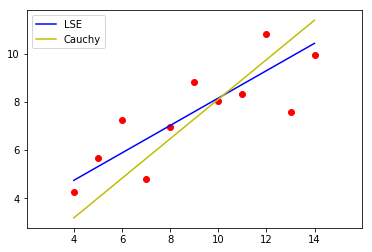

In [12]:
#Vertical

x = dataset1[0].values
y = dataset1[1].values

wk = [2,0]

w_candidate = vertical_offset(wk,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

w_candidate_Cauchy = vertical_offset_Cauchy(wk,x,y)

w0_C = w_candidate_Cauchy[0]
w1_C = w_candidate_Cauchy[1]

x_in = np.arange(np.min(x),np.max(x),0.01)

Z = w0*x_in + w1
Z_C = w0_C*x_in + w1_C
plt.plot(x,y,'ro')
plt.axis('equal')
plt.plot(x_in,Z,'b', label = 'LSE')
plt.plot(x_in,Z_C,'y', label = 'Cauchy')
plt.legend()


$\underline{Dataset\ 2}$

Stopping criterion is satisfied:  0.0009987561475952589
Number of steps needed to converge: 298
The minimum reached is:  [0.65283685 1.44008533]
Error: 8.361728518452122
Stopping criterion is satisfied:  0.0009596756322736155
Number of steps needed to converge: 129
The minimum reached is:  [ 0.71433564 -0.0123481 ]
Error: 6.414197245527247


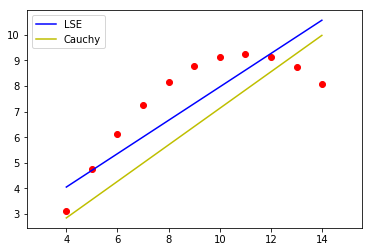

In [13]:
#Vertical

x = dataset2[0].values
y = dataset2[1].values

wk = [1,0]

w_candidate = vertical_offset(wk,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

w_candidate_Cauchy = vertical_offset_Cauchy(wk,x,y)

w0_C = w_candidate_Cauchy[0]
w1_C = w_candidate_Cauchy[1]

x_in = np.arange(np.min(x),np.max(x),0.01)

Z = w0*x_in + w1
Z_C = w0_C*x_in + w1_C
plt.plot(x,y,'ro')
plt.axis('equal')
plt.plot(x_in,Z,'b', label = 'LSE')
plt.plot(x_in,Z_C,'y', label = 'Cauchy')
plt.legend()


$\underline{Dataset\ 3}$

Stopping criterion is satisfied:  0.0009201477884381859
Number of steps needed to converge: 175
The minimum reached is:  [0.45167858 3.52304317]
Error: 7.047810845110713
Stopping criterion is satisfied:  0.0009483004357899727
Number of steps needed to converge: 138
The minimum reached is:  [0.37986576 3.8174848 ]
Error: 1.5235715798503506


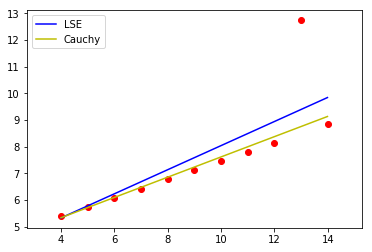

In [14]:
#Vertical

x = dataset3[0].values
y = dataset3[1].values

wk = [2,4]

w_candidate = vertical_offset(wk,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

w_candidate_Cauchy = vertical_offset_Cauchy(wk,x,y)

w0_C = w_candidate_Cauchy[0]
w1_C = w_candidate_Cauchy[1]

x_in = np.arange(np.min(x),np.max(x),0.01)

Z = w0*x_in + w1
Z_C = w0_C*x_in + w1_C
plt.plot(x,y,'ro')
plt.axis('equal')
plt.plot(x_in,Z,'b', label = 'LSE')
plt.plot(x_in,Z_C,'y', label = 'Cauchy')
plt.legend()


$\underline{Dataset\ 4}$

Stopping criterion is satisfied:  0.000996001092767429
Number of steps needed to converge: 520
The minimum reached is:  [0.57584149 2.24200659]
Error: 7.220403816908437
Stopping criterion is satisfied:  0.0009749705131341102
Number of steps needed to converge: 187
The minimum reached is:  [0.70699135 0.07653931]
Error: 5.587409356347556


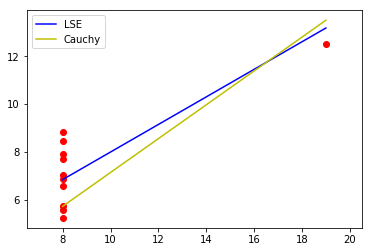

In [16]:
#Vertical

x = dataset4[0].values
y = dataset4[1].values

wk = [0,0]

w_candidate = vertical_offset(wk,x,y)

w0 = w_candidate[0]
w1 = w_candidate[1]

w_candidate_Cauchy = vertical_offset_Cauchy(wk,x,y)

w0_C = w_candidate_Cauchy[0]
w1_C = w_candidate_Cauchy[1]

x_in = np.arange(np.min(x),np.max(x),0.01)

Z = w0*x_in + w1
Z_C = w0_C*x_in + w1_C
plt.plot(x,y,'ro')
plt.axis('equal')
plt.plot(x_in,Z,'b', label = 'LSE')
plt.plot(x_in,Z_C,'y', label = 'Cauchy')
plt.legend()


Comparing the results using both robust functions we see that the parameters obtained are different. So, in the vertical offset, the objective function used has an influence over the parameters computed. Previously, we have observed that the Cauchy function is not so sensitive to outliers as Least Square Error is. As a proof of that, it could be appreciatted in the plots that the line obtained using the Cauchy function is more far from the outliers than the one obtained using LSE. Concluding, we have achieved a model which is more robust to outliers than we previously did.

#### Perpendicular offset

In [9]:
def F_perp_Cauchy(w,x,y):
    
    r = 0
    u = 0
    N = len(x)
    
    for i in range(N):
        u = abs(w[0]*x[i]+w[1]*y[i]+w[2])/np.sqrt(w[0]**2 + w[1]**2)
        
        r+= 0.5*np.log(1+(u)**2)
        
    return(r)
    
#calculate the gradient for the Cauchy    
def gradient_perp_Cauchy(w,x,y):
    
    dQ = [0,0,0]
    dQ_dw0 = 0
    dQ_dw1 = 0
    dQ_db = 0
    
    N = len(x)
    
    for i in range(N):
        
        u = abs(w[0]*x[i]+w[1]*y[i]+w[2])/np.sqrt(w[0]**2 + w[1]**2)
        
        num = (w[0]*x[i]+w[1]*y[i]+w[2])
        norm = (w[0]**2+w[1]**2)
        
        du_dw0 = (x[i]*norm *num - w[0]*num**2)/(abs(num)*norm**(3/2))
        #du_dw0 = 2*w[0]*(abs(w[0]*x[i]+w[1]*y[i]+w[2])/np.sqrt((w[0]**2 + w[1]**2)**3)) + (w[0]*x[i]+w[1]*y[i]+w[2])*x[i]/((np.sqrt(w[0]**2 + w[1]**2)*abs(w[0]*x[i]+w[1]*y[i]+w[2])))
        
        dQ_dw0 += u*du_dw0/(1+u**2)
        
    for j in range(N):
        u = abs(w[0]*x[j]+w[1]*y[j]+w[2])/np.sqrt(w[0]**2 + w[1]**2)
        
        num = (w[0]*x[j]+w[1]*y[j]+w[2])
        norm = (w[0]**2+w[1]**2)
        
        du_dw1 = (y[j]*num)/(np.sqrt(norm)*abs(num))-(w[1]*abs(num)/norm**(3/2))
        #du_dw1 = 2*w[1]*(abs(w[0]*x[j]+w[1]*y[j]+w[2])/np.sqrt((w[0]**2 + w[1]**2)**3)) + (w[0]*x[j]+w[1]*y[j]+w[2])*y[j]/((np.sqrt(w[0]**2 + w[1]**2)*abs(w[0]*x[j]+w[1]*y[j]+w[2])))
        
        dQ_dw1 += u*du_dw1/(1+u**2)
        
    for k in range(N):
        u = abs(w[0]*x[k]+w[1]*y[k]+w[2])/np.sqrt(w[0]**2 + w[1]**2)
        
        num = (w[0]*x[k]+w[1]*y[k]+w[2])
        norm = (w[0]**2+w[1]**2)
        
        du_db = num/(np.sqrt(norm)*abs(num))
        
        #du_db = (w[0]*x[k]+w[1]*y[k]+w[2])/((np.sqrt(w[0]**2 + w[1]**2)*abs(w[0]*x[k]+w[1]*y[k]+w[2])))
        
        dQ_db += u*du_db/(1+u**2)
    
    dQ[0] = dQ_dw0

    dQ[1] = dQ_dw1
    
    dQ[2] = dQ_db
    
    return(dQ)

In [10]:
def perp_offset_Cauchy(pk,x,y):

    pk_list = []
    pk_list.append(pk)

    alpha = 0.0001
    max_iter = 1000
    k = 0
    norm_ord = 2

    p_candidate = np.subtract(pk,alpha*np.array(gradient_perp_Cauchy(pk,x,y)))
    p_candidate = p_candidate/np.linalg.norm(p_candidate,norm_ord)

    while True:

   
        p_candidate = np.subtract(pk,alpha*np.array(gradient_perp_Cauchy(pk,x,y)))
        p_candidate = p_candidate/np.linalg.norm(p_candidate,norm_ord)
        
    
        pk_list.append(p_candidate.tolist())
    
        k+=1
    
        if (abs(F_perp_Cauchy(p_candidate,x,y) - F_perp_Cauchy(pk,x,y))<(10**-3)):
            print('Stopping criterion is satisfied: ',abs((F_perp_Cauchy(p_candidate,x,y)-F_perp_Cauchy(pk,x,y))))
            break
        
        pk = p_candidate
        p_candidate = np.subtract(pk,alpha*np.array(gradient_perp_Cauchy(pk,x,y)))
        p_candidate = p_candidate/np.linalg.norm(p_candidate,norm_ord)
        
    print('The minimum reached is: ',p_candidate)
    print('Norm',np.linalg.norm(p_candidate,norm_ord))
    print('Error: ',F_perp_Cauchy(p_candidate,x,y))
    return(p_candidate)


$\underline{Dataset\ 1}$

Stopping criterion is satisfied:  0.0009485530936972353
The minimum reached is:  [-0.62265034  0.77981635 -0.06475354]
Norm 1.0
Error:  7.372666722678271
Stopping criterion is satisfied:  0.0009750940836412703
The minimum reached is:  [-0.6265006   0.776294   -0.06974678]
Norm 1.0
Error:  3.76413784201727


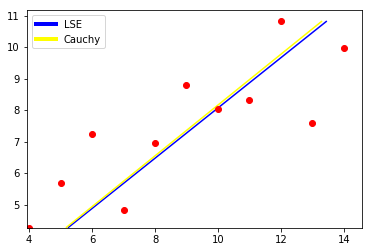

In [37]:
#Vertical

x = dataset1[0].values
y = dataset1[1].values

plt.plot(x,y,'ro')
plt.axis('equal')

#Perpendicular
pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)
p_candidate_Cauchy = perp_offset_Cauchy(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

w0_C = p_candidate_Cauchy[0]
w1_C = p_candidate_Cauchy[1]
b_C = p_candidate_Cauchy[2]

x = np.arange(np.min(x),np.max(x),0.01)
y = np.arange(np.min(y),np.max(y),0.01)
[X,Y] = np.meshgrid(x,y)
Z = w0 * X + w1 * Y + b

plt.contour(X,Y,Z,[0],colors = 'blue')

Z_C = w0_C * X + w1_C * Y + b_C

plt.contour(X,Y,Z_C,[0],colors = 'yellow')

#plt.legend(title= 'Perpendicular', fontsize= 8) 
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='yellow', lw=4)]

plt.legend(custom_lines, ['LSE', 'Cauchy'],loc = "upper left")

plt.show()


$\underline{Dataset\ 2}$

Stopping criterion is satisfied:  0.000948652814864559
The minimum reached is:  [-0.62264996  0.77981658 -0.06475433]
Norm 1.0000000000000002
Error:  7.378641198619376
Stopping criterion is satisfied:  0.0009773799608963074
The minimum reached is:  [-0.65038873  0.755955   -0.07434068]
Norm 1.0
Error:  3.391476062103897


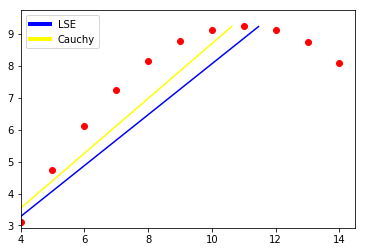

In [36]:
#Vertical

x = dataset2[0].values
y = dataset2[1].values

plt.plot(x,y,'ro')
plt.axis('equal')

#Perpendicular
pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)
p_candidate_Cauchy = perp_offset_Cauchy(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

w0_C = p_candidate_Cauchy[0]
w1_C = p_candidate_Cauchy[1]
b_C = p_candidate_Cauchy[2]

x = np.arange(np.min(x),np.max(x),0.01)
y = np.arange(np.min(y),np.max(y),0.01)
[X,Y] = np.meshgrid(x,y)
Z = w0 * X + w1 * Y + b

plt.contour(X,Y,Z,[0],colors = 'blue')

Z_C = w0_C * X + w1_C * Y + b_C

plt.contour(X,Y,Z_C,[0],colors = 'yellow')

#plt.legend(title= 'Perpendicular', fontsize= 8) 
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='yellow', lw=4)]

plt.legend(custom_lines, ['LSE', 'Cauchy'],loc = "upper left")

plt.show()


$\underline{Dataset\ 3}$

Stopping criterion is satisfied:  0.0009500092255505521
The minimum reached is:  [-0.62259003  0.77986419 -0.06475723]
Norm 1.0
Error:  7.376704876687373
Stopping criterion is satisfied:  0.0009605010925848312
The minimum reached is:  [-0.60926292  0.79004078 -0.0680754 ]
Norm 0.9999999999999999
Error:  3.92583845901806


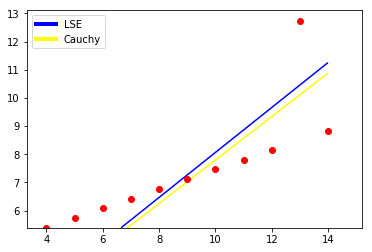

In [23]:
#Vertical

x = dataset3[0].values
y = dataset3[1].values

plt.plot(x,y,'ro')
plt.axis('equal')

#Perpendicular
pk = [0,1,0]

p_candidate = perp_offset(pk,x,y)
p_candidate_Cauchy = perp_offset_Cauchy(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

w0_C = p_candidate_Cauchy[0]
w1_C = p_candidate_Cauchy[1]
b_C = p_candidate_Cauchy[2]

x = np.arange(np.min(x),np.max(x),0.01)
y = np.arange(np.min(y),np.max(y),0.01)
[X,Y] = np.meshgrid(x,y)
Z = w0 * X + w1 * Y + b

plt.contour(X,Y,Z,[0],colors = 'blue')

Z_C = w0_C * X + w1_C * Y + b_C

plt.contour(X,Y,Z_C,[0],colors = 'yellow')

#plt.legend(title= 'Perpendicular', fontsize= 8) 
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='yellow', lw=4)]

plt.legend(custom_lines, ['LSE', 'Cauchy'],loc = "upper left")

plt.show()


$\underline{Dataset\ 4}$

Stopping criterion is satisfied:  0.0008997578671134931
The minimum reached is:  [ 0.63272966 -0.77072542 -0.07507003]
Norm 1.0
Error:  7.635760574754971
Stopping criterion is satisfied:  0.0009471989307163753
The minimum reached is:  [ 0.6622331  -0.74413927 -0.08777282]
Norm 0.9999999999999999
Error:  3.694364331885539


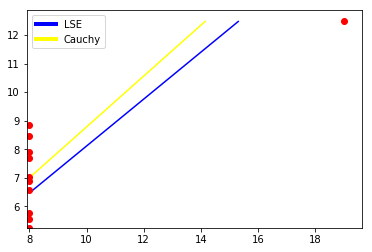

In [40]:
#Vertical

x = dataset4[0].values
y = dataset4[1].values

plt.plot(x,y,'ro')
plt.axis('equal')

#Perpendicular
pk = [1,0,0]

p_candidate = perp_offset(pk,x,y)
p_candidate_Cauchy = perp_offset_Cauchy(pk,x,y)

w0 = p_candidate[0]
w1 = p_candidate[1]
b = p_candidate[2]

w0_C = p_candidate_Cauchy[0]
w1_C = p_candidate_Cauchy[1]
b_C = p_candidate_Cauchy[2]

x = np.arange(np.min(x),np.max(x),0.01)
y = np.arange(np.min(y),np.max(y),0.01)
[X,Y] = np.meshgrid(x,y)
Z = w0 * X + w1 * Y + b

plt.contour(X,Y,Z,[0],colors = 'blue')

Z_C = w0_C * X + w1_C * Y + b_C

plt.contour(X,Y,Z_C,[0],colors = 'yellow')

#plt.legend(title= 'Perpendicular', fontsize= 8) 
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='yellow', lw=4)]

plt.legend(custom_lines, ['LSE', 'Cauchy'],loc = "upper left")

plt.show()


As we did before for the vertical offset method, we have plotted the regression lines obtained using both functions, Least Square Error and Cauchy, and once again we proved the influence of the used function over the parameters. The values obtained are different depending on the function used, and as a consequence, the regression line is distinct. For those set of samples which clearly contains outliers, the regression line when using Cauchy function is less afected by the value of this odd sample.